# Базовые методы

Источник: [Лекция 1. Введение. Основные понятия. Временной ряд. ][1]

[1]: https://www.youtube.com/watch?v=d3x9CPUDJKo

# Заметки к лекции

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

#from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('data/series_g.csv', sep=';')

In [3]:
df.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [5]:
# Самопроверка, Смотрим начало и конец таблицы. Все ли хорошо?
df.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961])

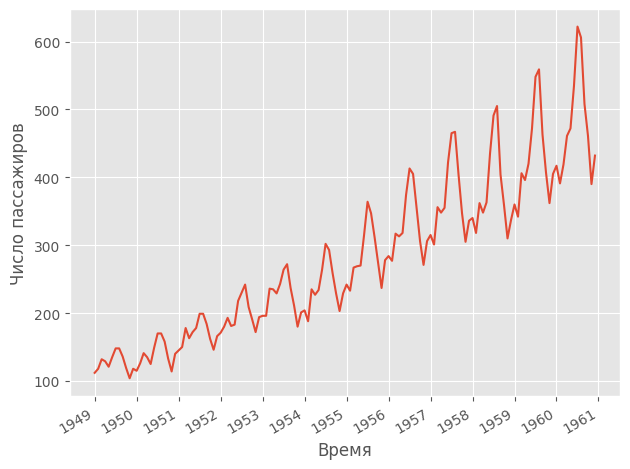

In [11]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['series_g'])
ax.set_xlabel('Время')
ax.set_ylabel('Число пассажиров')

plt.xticks(np.arange(0,145,12), np.arange(1949,1962));

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('f_01_02.png', dpi=300, facecolor='white')

# График ряда. Расщепляем на обучающую и тестовую выборки

[axvspan docs][1]

[axvspan example][2]

[1]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html
[2]: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py

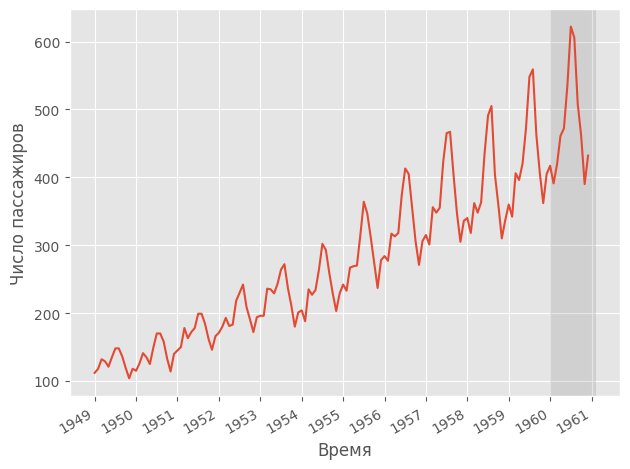

In [12]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['series_g'])
ax.set_xlabel('Время')
ax.set_ylabel('Число пассажиров')
ax.axvspan(132,145, color='#808080', alpha=0.2)

plt.xticks(np.arange(0,145,12), np.arange(1949,1962));

fig.autofmt_xdate()
plt.tight_layout()

Разделяем на обучающую и тестовую выборки

In [15]:
x_train = df[:-12]
x_test = df[-12:]
print(x_train.shape, x_test.shape)

(132, 2) (12, 2)


In [16]:
x_train.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [18]:
x_test.head()

,date,series_g
132,JAN 1960,417
133,FEB 1960,391
134,MAR 1960,419
135,APR 1960,461
136,MAY 1960,472


# 1 Среднее по обучающей выборке как прогноз

If we write: `x_test['mean_1'] = np.mean(x_train['series_g'])`
then we get:

```
SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

x_test['mean_1'] = np.mean(x_train['series_g'])
```
so we will use:

In [26]:
# https://sparkbyexamples.com/pandas/pandas-add-constant-column-to-dataframe/
x_test.loc[:,'mean_1'] = np.mean(x_train['series_g'])

x_test.head(12)

,date,series_g,mean_1
132,JAN 1960,417,262.492424
133,FEB 1960,391,262.492424
134,MAR 1960,419,262.492424
135,APR 1960,461,262.492424
136,MAY 1960,472,262.492424
137,JUN 1960,535,262.492424
138,JUL 1960,622,262.492424
139,AUG 1960,606,262.492424
140,SEP 1960,508,262.492424
141,OCT 1960,461,262.492424


Осторожно в следующей реализации `mape` возможно деление на 0

In [37]:
# векторно вычислять надо
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [33]:
print('MAPE при прогнозировании средним по выборке равно ',
      mape(x_test['series_g'], x_test['mean_1']))

MAPE при прогнозировании средним по выборке равно  43.62152220711003


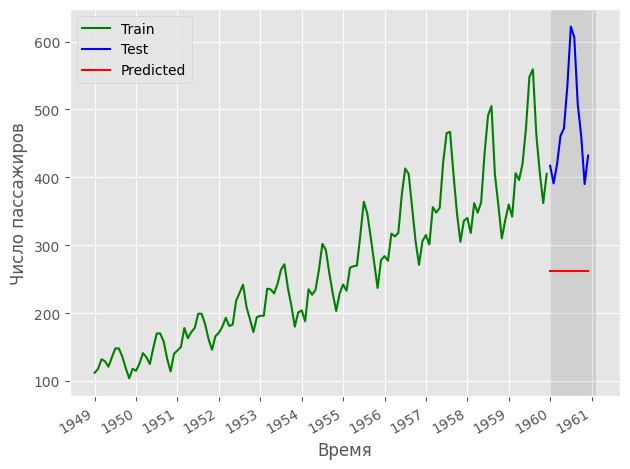

In [38]:
fig, ax = plt.subplots()


ax.plot(x_train['date'], x_train['series_g'], 'g-', label='Train')
ax.plot(x_test['date'], x_test['series_g'], 'b-', label='Test')
ax.plot(x_test['date'], x_test['mean_1'], 'r-', label='Predicted')

ax.set_xlabel('Время')
ax.set_ylabel('Число пассажиров')
ax.axvspan(132,145, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,145,12), np.arange(1949,1962));

fig.autofmt_xdate()
plt.tight_layout()

Вывод: учитываем все дынные, но не учитываем тренд (не говоря о сезонности).  

# 2 Среднее по последнему сезону как прогноз 

In [41]:
x_test.loc[:, 'mean_2'] = np.mean(x_train['series_g'][-12:])
x_test.head(12)

,date,series_g,mean_1,mean_2
132,JAN 1960,417,262.492424,428.333333
133,FEB 1960,391,262.492424,428.333333
134,MAR 1960,419,262.492424,428.333333
135,APR 1960,461,262.492424,428.333333
136,MAY 1960,472,262.492424,428.333333
137,JUN 1960,535,262.492424,428.333333
138,JUL 1960,622,262.492424,428.333333
139,AUG 1960,606,262.492424,428.333333
140,SEP 1960,508,262.492424,428.333333
141,OCT 1960,461,262.492424,428.333333


In [42]:
print('MAPE при прогнозировании средним по последнему сезону равно ',
      mape(x_test['series_g'], x_test['mean_2']))

MAPE при прогнозировании средним по выборке равно  12.055750606375332


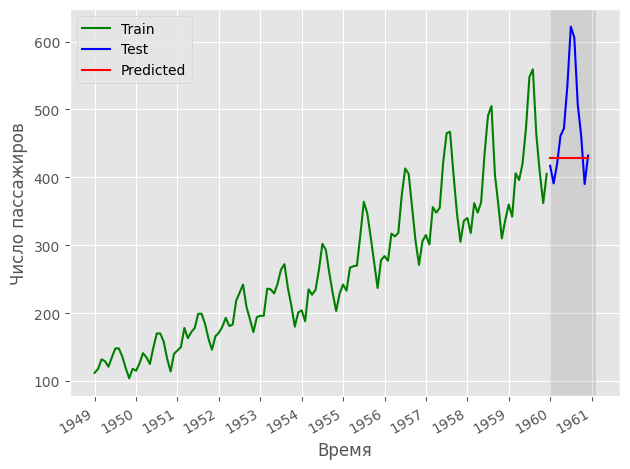

In [43]:
fig, ax = plt.subplots()

ax.plot(x_train['date'], x_train['series_g'], 'g-', label='Train')
ax.plot(x_test['date'], x_test['series_g'], 'b-', label='Test')
ax.plot(x_test['date'], x_test['mean_2'], 'r-', label='Predicted')

ax.set_xlabel('Время')
ax.set_ylabel('Число пассажиров')
ax.axvspan(132,145, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,145,12), np.arange(1949,1962));

fig.autofmt_xdate()
plt.tight_layout()

Вывод: лучше чем по всему периоду, но нет сезонности.

# 3 Последнее значение ряда как прогноз

In [45]:
x_test.loc[:, 'last_1'] = x_train['series_g'].iloc[-1]
x_test.head(12)

,date,series_g,mean_1,mean_2,last_1
132,JAN 1960,417,262.492424,428.333333,405
133,FEB 1960,391,262.492424,428.333333,405
134,MAR 1960,419,262.492424,428.333333,405
135,APR 1960,461,262.492424,428.333333,405
136,MAY 1960,472,262.492424,428.333333,405
137,JUN 1960,535,262.492424,428.333333,405
138,JUL 1960,622,262.492424,428.333333,405
139,AUG 1960,606,262.492424,428.333333,405
140,SEP 1960,508,262.492424,428.333333,405
141,OCT 1960,461,262.492424,428.333333,405


In [46]:
print('MAPE при прогнозировании последним значением ряда равно ',
      mape(x_test['series_g'], x_test['last_1']))

MAPE при прогнозировании средним по выборке равно  14.251338486772209


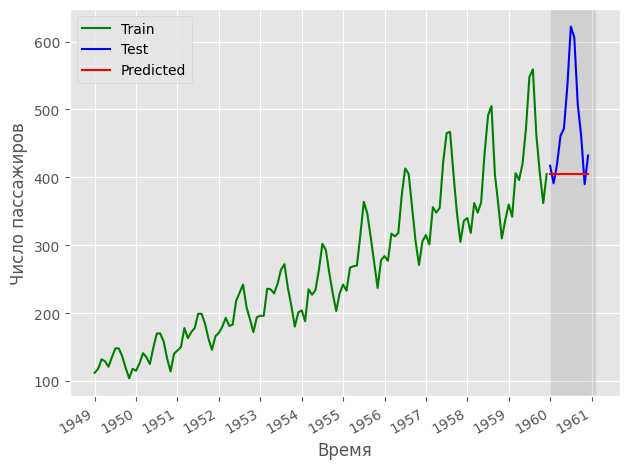

In [47]:
fig, ax = plt.subplots()

ax.plot(x_train['date'], x_train['series_g'], 'g-', label='Train')
ax.plot(x_test['date'], x_test['series_g'], 'b-', label='Test')
ax.plot(x_test['date'], x_test['last_1'], 'r-', label='Predicted')

ax.set_xlabel('Время')
ax.set_ylabel('Число пассажиров')
ax.axvspan(132,145, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,145,12), np.arange(1949,1962));

fig.autofmt_xdate()
plt.tight_layout()

Вывод: в данном случае уще хуже, чем среднее за последний сезон. Основной недостаток, метод не знает, что есть сезонность.

# 4 последний сезон ряда как прогноз

In [52]:
x_test.loc[:, 'last_2'] = x_train['series_g'][-12:].values
x_test.head(12)

,date,series_g,mean_1,mean_2,last_1,last_2
132,JAN 1960,417,262.492424,428.333333,405,360.0
133,FEB 1960,391,262.492424,428.333333,405,342.0
134,MAR 1960,419,262.492424,428.333333,405,406.0
135,APR 1960,461,262.492424,428.333333,405,396.0
136,MAY 1960,472,262.492424,428.333333,405,420.0
137,JUN 1960,535,262.492424,428.333333,405,472.0
138,JUL 1960,622,262.492424,428.333333,405,548.0
139,AUG 1960,606,262.492424,428.333333,405,559.0
140,SEP 1960,508,262.492424,428.333333,405,463.0
141,OCT 1960,461,262.492424,428.333333,405,407.0


In [53]:
print('MAPE при прогнозировании последним сезоном ряда равно ',
      mape(x_test['series_g'], x_test['last_2']))

MAPE при прогнозировании средним по выборке равно  9.987532920823485


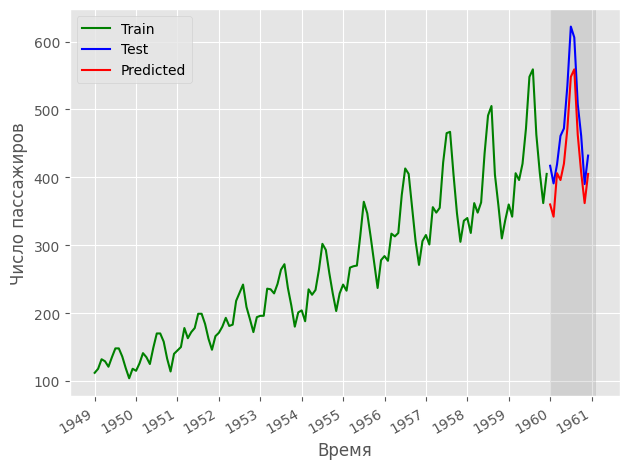

In [54]:
fig, ax = plt.subplots()

ax.plot(x_train['date'], x_train['series_g'], 'g-', label='Train')
ax.plot(x_test['date'], x_test['series_g'], 'b-', label='Test')
ax.plot(x_test['date'], x_test['last_2'], 'r-', label='Predicted')

ax.set_xlabel('Время')
ax.set_ylabel('Число пассажиров')
ax.axvspan(132,145, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,145,12), np.arange(1949,1962));

fig.autofmt_xdate()
plt.tight_layout()

Вывод: каким-то образом учитывается сезонность, но нет влияния от тренда

# Сравним MAPE у рассмотренных методов

In [57]:
print('MAPE при прогнозировании')
print('средним по выборке равно ',
      mape(x_test['series_g'], x_test['mean_1']))
print('средним по последнему сезону равно ',
      mape(x_test['series_g'], x_test['mean_2']))
print('последним значением ряда равно ',
      mape(x_test['series_g'], x_test['last_1']))
print('последним сезоном ряда равно ',
      mape(x_test['series_g'], x_test['last_2']))

MAPE при прогнозировании
средним по выборке равно  43.62152220711003
средним по последнему сезону равно  12.055750606375332
последним значением ряда равно  14.251338486772209
последним сезоном ряда равно  9.987532920823485


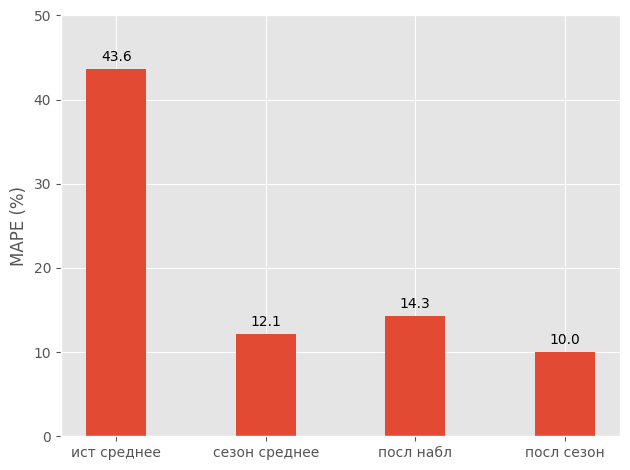

In [59]:
fig, ax = plt.subplots()

x = ['ист среднее', 'сезон среднее', 'посл набл', 'посл сезон']
y = [round(mape(x_test['series_g'], x_test['mean_1']),1),
     round(mape(x_test['series_g'], x_test['mean_2']),1),
     round(mape(x_test['series_g'], x_test['last_1']),1),
     round(mape(x_test['series_g'], x_test['last_2']),1)]

ax.bar(x, y, width=0.4)
ax.set_xlabel('')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 50)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')
    
plt.tight_layout()

Выводы: 
- Историческое среднее дает совсем плохой прогноз.
- Сезонное среднее и последний сезон дают наиболее лучший прогноз. 

Отметим, что базовые методы не всегда работают так глупо как получилось в нашем примере. 

Вопросы: 
- "Когда последнее наблюдение будет лучшим возможным прогнозом?" 
- "Когда среднее арифметическое временного ряда будет лучшим возможным прогнозом?" 

---
(Дополнение от Вадима Аббакумова)
В качестве базового временного прогноза лучше всего использовать **экспоненциальное сглаживание**.